<a href="https://colab.research.google.com/github/mdrinkard/Project-2/blob/main/Data_Analysis_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Installing Required Modules on Google
!pip install hvplot
!pip install tensorflow
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 13.2 MB/s eta 0:00:00


In [ ]:
### Importing those Modules
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [ ]:
### Uploading Dataset
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]


Saving SBA_CLEANED .csv to SBA_CLEANED .csv


In [ ]:
### Creating Dataframe
df = pd.read_csv('SBA_CLEANED .csv')
df

,City,State,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,Industry,TermGroup,NewBankState,IsFranchise,City_Count,NewBank
0,EVANSVILLE,IN,4,2.0,0,0,0,N,Y,0,60000,Retail Trade,Below 3 months,OH,Y,318,FIFTH THIRD BANK
1,EVANSVILLE,IN,3,2.0,0,0,0,N,Y,0,90000,Construction,Below 3 months,OH,Y,318,FIFTH THIRD BANK
2,EVANSVILLE,IN,4,1.0,0,0,0,N,Y,1,60000,Retail Trade,Below 3 months,OH,Y,318,FIFTH THIRD BANK
3,EVANSVILLE,IN,11,1.0,0,0,0,N,N,0,300000,Unknown Sector,Below 3 months,OH,Y,318,FIFTH THIRD BANK
4,EVANSVILLE,IN,7,2.0,0,7,2,N,N,1,415000,Retail Trade,Below 3 months,OH,Y,318,FIFTH THIRD BANK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885300,MEALLY,KY,3,2.0,0,0,0,N,Y,0,40000,Construction,Below 3 months,KY,Y,1,OTHER
885301,GUSTON,KY,2,2.0,0,0,0,N,Y,0,20000,Unknown Sector,Below 3 months,KY,Y,1,OTHER
885302,"GERING,",NE,15,2.0,0,0,0,N,N,1,252000,Unknown Sector,3-6 months,IL,Y,1,OTHER
885303,SHELLMAN,GA,2,2.0,0,0,0,N,Y,0,100000,Unknown Sector,3-6 months,GA,Y,1,OTHER


In [ ]:
def report(df):
    col = []
    d_type = []
    uniques = []
    n_uniques = []
    nan = []

    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())
        nan.append(df[i].isna().sum()/len(df)*100)

    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques, 'nan%': nan})

report(df)

,Column,d_type,unique_sample,n_uniques,nan%
0,City,object,"[EVANSVILLE, BLOOMINGTON, ORLANDO, UNION, CHAR...",32268,0.000000
1,State,object,"[IN, FL, KY, NC, MI]",51,0.001468
2,NoEmp,int64,"[4, 3, 11, 7, 13]",597,0.000000
3,NewExist,float64,"[2.0, 1.0, nan, 0.0]",3,0.014684
4,CreateJob,int64,"[0, 7, 2, 8, 5]",245,0.000000
5,RetainedJob,int64,"[0, 7, 60, 20, 16]",356,0.000000
6,UrbanRural,int64,"[0, 2, 1]",3,0.000000
7,RevLineCr,object,"[N, Y]",2,0.000000
8,LowDoc,object,"[Y, N]",2,0.000000
9,MIS_Status,int64,"[0, 1]",2,0.000000


In [ ]:
df_analysis = df.copy()
df_analysis = df_analysis.dropna()
df_analysis.drop(columns=['City_Count','City','NoEmp','UrbanRural'], inplace=True)
display(df_analysis.isnull().sum())

State           0
NewExist        0
CreateJob       0
RetainedJob     0
RevLineCr       0
LowDoc          0
MIS_Status      0
GrAppv          0
Industry        0
TermGroup       0
NewBankState    0
IsFranchise     0
NewBank         0
dtype: int64

In [ ]:
### We are ready to start working on the creating the skeleton for our neural network.
### As we have a number of categorical variables we will be using onehotencoder to transform the X variables.
### to make it applicable to the model.
display(df_analysis.dtypes)
categorical_variables = list(df_analysis.dtypes[df_analysis.dtypes == 'object'].index)
display(categorical_variables)


State            object
NewExist        float64
CreateJob         int64
RetainedJob       int64
RevLineCr        object
LowDoc           object
MIS_Status        int64
GrAppv            int64
Industry         object
TermGroup        object
NewBankState     object
IsFranchise      object
NewBank          object
dtype: object

['State',
 'RevLineCr',
 'LowDoc',
 'Industry',
 'TermGroup',
 'NewBankState',
 'IsFranchise',
 'NewBank']

In [ ]:
df_analysis['NewBank'].value_counts(normalize=True)

OTHER                             0.457259
BANK OF AMERICA NATL ASSOC        0.097528
WELLS FARGO BANK NATL ASSOC       0.070692
JPMORGAN CHASE BANK NATL ASSOC    0.054023
U.S. BANK NATIONAL ASSOCIATION    0.039195
CITIZENS BANK NATL ASSOC          0.038099
PNC BANK, NATIONAL ASSOCIATION    0.030713
BBCN BANK                         0.025859
CAPITAL ONE NATL ASSOC            0.025095
MANUFACTURERS & TRADERS TR CO     0.012600
READYCAP LENDING, LLC             0.011964
THE HUNTINGTON NATIONAL BANK      0.010752
KEYBANK NATIONAL ASSOCIATION      0.010356
TD BANK, NATIONAL ASSOCIATION     0.010060
BRANCH BK. & TR CO                0.009042
ZIONS FIRST NATIONAL BANK         0.008908
CALIFORNIA BANK & TRUST           0.008435
CITIBANK, N.A.                    0.008409
BANCO POPULAR NORTH AMERICA       0.008076
REGIONS BANK                      0.008065
COMERICA BANK                     0.007874
BANK OF THE WEST                  0.007429
COMPASS BANK                      0.007157
BUSINESS LO

In [ ]:
enc= OneHotEncoder(sparse_output=False)
enc

OneHotEncoder(sparse_output=False)

In [ ]:
encoded_data = enc.fit_transform(df_analysis[categorical_variables])
encoded_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names_out(categorical_variables)
)
encoded_df.shape

(885162, 163)

In [ ]:
display(encoded_df.isnull().sum())

State_AK                                  0
State_AL                                  0
State_AR                                  0
State_AZ                                  0
State_CA                                  0
                                         ..
NewBank_THE HUNTINGTON NATIONAL BANK      0
NewBank_U.S. BANK NATIONAL ASSOCIATION    0
NewBank_UMPQUA BANK                       0
NewBank_WELLS FARGO BANK NATL ASSOC       0
NewBank_ZIONS FIRST NATIONAL BANK         0
Length: 163, dtype: int64

In [ ]:
unscaled_df = pd.concat([encoded_df, df_analysis.drop(columns=categorical_variables)],axis = 1)
unscaled_df

,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,...,NewBank_THE HUNTINGTON NATIONAL BANK,NewBank_U.S. BANK NATIONAL ASSOCIATION,NewBank_UMPQUA BANK,NewBank_WELLS FARGO BANK NATL ASSOC,NewBank_ZIONS FIRST NATIONAL BANK,NewExist,CreateJob,RetainedJob,MIS_Status,GrAppv
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,60000.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,90000.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,60000.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,300000.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7.0,1.0,415000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,0.0,40000.0
885301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,0.0,20000.0
885302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,1.0,252000.0
885303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,0.0,100000.0


In [ ]:
unscaled_df['State_AK'].value_counts(dropna=False)

0.0    882797
1.0      2365
NaN       142
Name: State_AK, dtype: int64

In [ ]:
display(encoded_df.shape)
display(df_analysis.shape)
display(unscaled_df.shape)

(885162, 163)

(885162, 13)

(885304, 168)

In [ ]:
unscaled_df.dropna(inplace=True)
unscaled_df.isnull().sum()

State_AK       0
State_AL       0
State_AR       0
State_AZ       0
State_CA       0
              ..
NewExist       0
CreateJob      0
RetainedJob    0
MIS_Status     0
GrAppv         0
Length: 168, dtype: int64

In [ ]:
y = unscaled_df['MIS_Status'].astype(int)
X = unscaled_df.drop(columns='MIS_Status')

In [ ]:
display(y.shape)
X.shape

(885020,)

(885020, 167)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [ ]:
### Now to Scale my Data
scaler = StandardScaler()

X_scaler= scaler.fit(X)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [ ]:
### Time to Start creating the Neural Network.
number_input_features= len(X_train.iloc[0])
number_input_features

167

In [ ]:
# Defining Layers
number_output_neurons = 1
hidden_node_1 = 250
hidden_node_2 = 150
# hidden_node_3 = 100
# hidden_node_4 = 50
# hidden_node_5 = 25
nn=Sequential()

In [ ]:
nn.add(Dense(
    units=hidden_node_1,
    input_dim=number_input_features,
    activation='relu'
))

In [ ]:
nn.add(Dense(
    units=hidden_node_2,
    activation='relu'
))

In [ ]:
# nn.add(Dense(
#     units=hidden_node_3,
#     activation='relu'
# ))

In [ ]:
# nn.add(Dense(
#     units=hidden_node_4,
#     activation='relu'
# ))

In [ ]:
# nn.add(Dense(
#     units=hidden_node_5,
#     activation='relu'
# ))

In [ ]:
nn.add(Dense(
    units=number_output_neurons,
    activation='sigmoid'
))

In [ ]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               42000     
                                                                 
 dense_1 (Dense)             (None, 150)               37650     
                                                                 
 dense_2 (Dense)             (None, 1)                 151       
                                                                 
Total params: 79801 (311.72 KB)
Trainable params: 79801 (311.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
### Compiling the Model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
batchsize=2048

In [ ]:
fit_model = nn.fit(X_train_scaled,y_train, epochs=10, batch_size=batchsize)

Epoch 1/10
325/325 [==============================] - 9s 25ms/step - loss: 0.4324 - accuracy: 0.8261
Epoch 2/10
325/325 [==============================] - 7s 22ms/step - loss: 0.4200 - accuracy: 0.8302
Epoch 3/10
325/325 [==============================] - 8s 24ms/step - loss: 0.4168 - accuracy: 0.8315
Epoch 4/10
325/325 [==============================] - 8s 25ms/step - loss: 0.4150 - accuracy: 0.8320
Epoch 5/10
325/325 [==============================] - 7s 22ms/step - loss: 0.4138 - accuracy: 0.8324
Epoch 6/10
325/325 [==============================] - 8s 25ms/step - loss: 0.4127 - accuracy: 0.8325
Epoch 7/10
325/325 [==============================] - 7s 21ms/step - loss: 0.4118 - accuracy: 0.8328
Epoch 8/10
325/325 [==============================] - 8s 24ms/step - loss: 0.4110 - accuracy: 0.8328
Epoch 9/10
325/325 [==============================] - 9s 28ms/step - loss: 0.4102 - accuracy: 0.8330
Epoch 10/10
325/325 [==============================] - 7s 21ms/step - loss: 0.4096 - accura

In [ ]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6915/6915 - 15s - loss: 0.4206 - accuracy: 0.8297 - 15s/epoch - 2ms/step
Loss: 0.4206092357635498, Accuracy: 0.8296987414360046


In [ ]:
df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"]) + 1))

<Axes: >

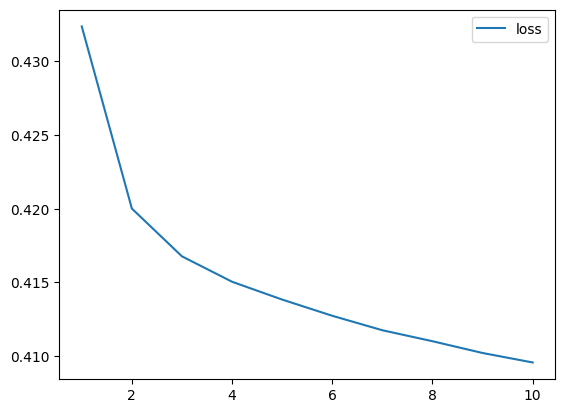

In [ ]:
df.plot(y="loss")

<Axes: >

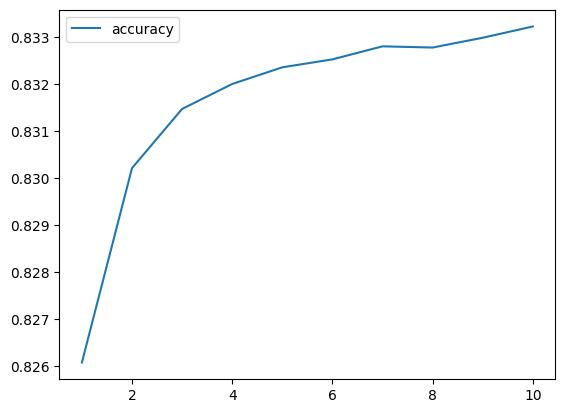

In [ ]:
df.plot(y="accuracy")